# Ejercicio: Mapa de imágenes usando PCA

Dimensionality reduction  
Curso: Big data con Python (2019)  
Profesor: Steven Van Vaerenbergh  
Universidad de Cantabria  

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

%matplotlib inline

# Datos

In [2]:
# Cargamos los datos
from sklearn.datasets import load_digits

digits = load_digits()

# Contenidos del diccionario "digits"
digits.keys()

dict_keys(['data', 'target', 'target_names', 'images', 'DESCR'])

In [3]:
# Tamaño del dataset
digits.data.shape

(1797, 64)

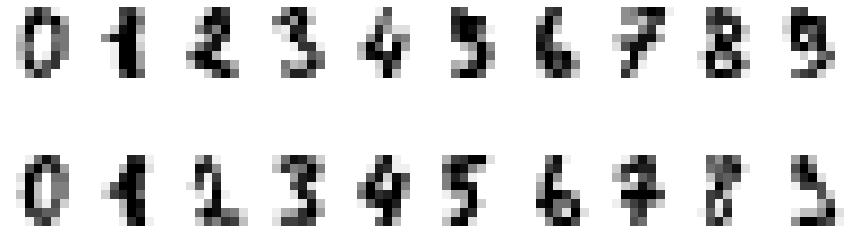

In [4]:
# Visualizamos algunos de los datos (imágenes)
images_and_labels = list(zip(digits.images, digits.target))

plt.figure(figsize=(15,5))
for index, (image, label) in enumerate(images_and_labels[:20]):
    plt.subplot(2, 10, index + 1)
    plt.axis('off')
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')

In [5]:
# Hallamos el número de características (píxeles) de cada imágen

X = digits.data
X[0].shape

(64,)

# a) Calcula los componentes principales

In [7]:
pca = PCA()
pca.fit(X)
X_r = pca.transform(X)
X_r

array([[-1.25946645e+00,  2.12748835e+01, -9.46305462e+00, ...,
        -6.11367202e-30,  1.25724707e-30, -6.91392699e-16],
       [ 7.95761130e+00, -2.07686990e+01,  4.43950604e+00, ...,
         1.17121568e-15,  3.61608615e-16,  1.67046393e-16],
       [ 6.99192297e+00, -9.95598641e+00,  2.95855808e+00, ...,
        -8.77648186e-16,  3.83598436e-16,  1.16654252e-16],
       ...,
       [ 1.08012837e+01, -6.96025223e+00,  5.59955453e+00, ...,
        -7.51184340e-16, -9.63380210e-16,  9.70809841e-17],
       [-4.87210009e+00,  1.24239536e+01, -1.01708664e+01, ...,
        -1.13722424e-16,  4.60182757e-16, -1.23762878e-16],
       [-3.44389631e-01,  6.36554919e+00,  1.07737085e+01, ...,
        -9.09301354e-16,  1.45165476e-15,  2.70670966e-16]])

# Generamos un mapa de todos los dígitos

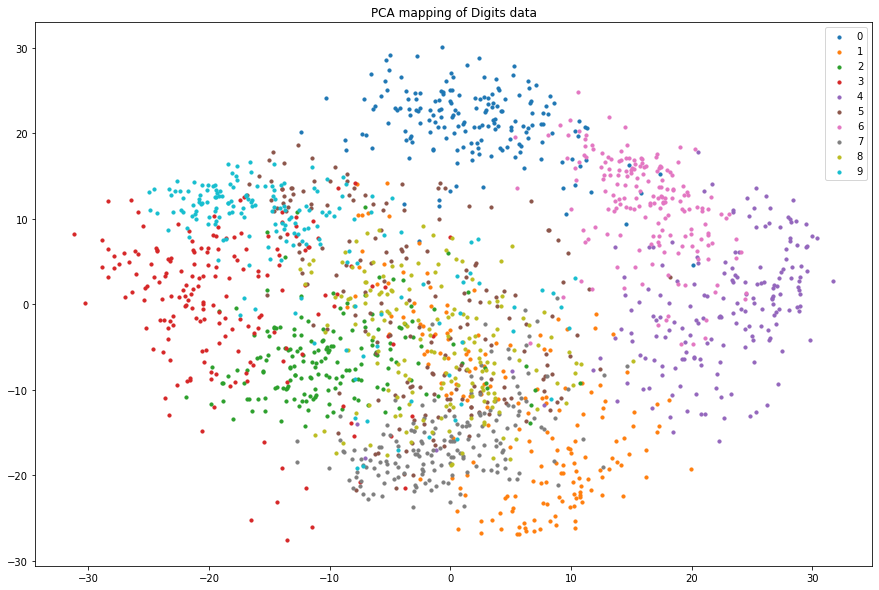

In [8]:
fig, ax = plt.subplots(figsize=[15,10])

for c in np.unique(digits.target):
    i = np.where(digits.target == c)
    
    # Dibuja todos los puntos de la clase i
    ax.scatter(X_r[i,0], X_r[i,1], label = c, s = 10)
    
ax.legend(loc='upper right')
plt.title("PCA mapping of Digits data")
plt.show()

# b) Visualiza la varianza explicada por los 64 componentes (Scree plot)

In [10]:
explained_variance = pca.explained_variance_ratio_
explained_variance

array([1.48905936e-01, 1.36187712e-01, 1.17945938e-01, 8.40997942e-02,
       5.78241466e-02, 4.91691032e-02, 4.31598701e-02, 3.66137258e-02,
       3.35324810e-02, 3.07880621e-02, 2.37234084e-02, 2.27269657e-02,
       1.82186331e-02, 1.77385494e-02, 1.46710109e-02, 1.40971560e-02,
       1.31858920e-02, 1.24813782e-02, 1.01771796e-02, 9.05617439e-03,
       8.89538461e-03, 7.97123157e-03, 7.67493255e-03, 7.22903569e-03,
       6.95888851e-03, 5.96081458e-03, 5.75614688e-03, 5.15157582e-03,
       4.89539777e-03, 4.28887968e-03, 3.73606048e-03, 3.53274223e-03,
       3.36683986e-03, 3.28029851e-03, 3.08320884e-03, 2.93778629e-03,
       2.56588609e-03, 2.27742397e-03, 2.22277922e-03, 2.11430393e-03,
       1.89909062e-03, 1.58652907e-03, 1.51159934e-03, 1.40578764e-03,
       1.16622290e-03, 1.07492521e-03, 9.64053065e-04, 7.74630271e-04,
       5.57211553e-04, 4.04330693e-04, 2.09916327e-04, 8.24797098e-05,
       5.25149980e-05, 5.05243719e-05, 3.29961363e-05, 1.24365445e-05,
      

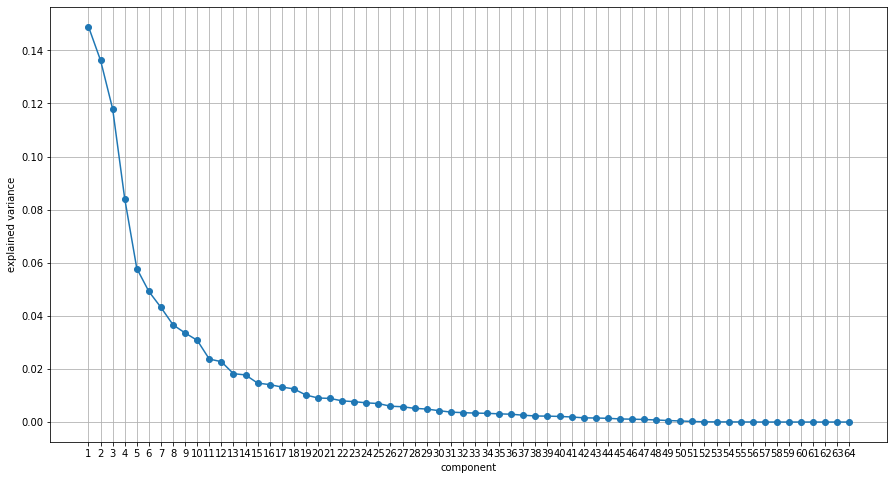

In [11]:
plt.figure(figsize=(15,8))
plt.plot(explained_variance,'-o')
plt.xlabel('component')
plt.ylabel('explained variance')

# Mejoramos las etiquetas del eje x
n_components = len(explained_variance)
plt.xticks(np.arange(n_components), np.arange(1,n_components+1))

plt.grid(True)
plt.show()

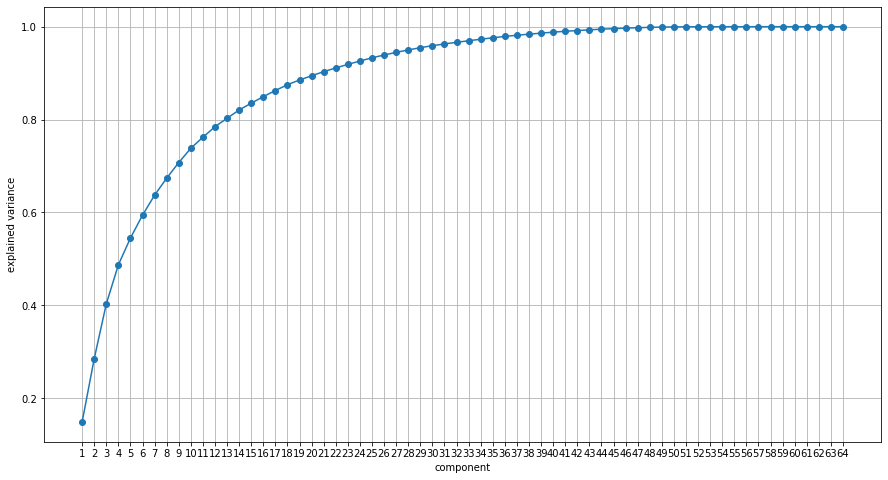

In [12]:
plt.figure(figsize=(15,8))
plt.plot(np.cumsum(explained_variance),'-o')
plt.xlabel('component')
plt.ylabel('explained variance')

# Mejoramos las etiquetas del eje x
n_components = len(explained_variance)
plt.xticks(np.arange(n_components), np.arange(1,n_components+1))

plt.grid(True)
plt.show()